In [1]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 521.2/521.2 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 13.7 MB/s eta 0:00:00


In [2]:
from datasets import load_dataset

In [3]:
squad_data = load_dataset("squad_v2")

Extracting data files:   0%|          | 0/2 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/130319 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/11873 [00:00<?, ? examples/s]

In [4]:
train = squad_data['train']
print(train)

Dataset({
    features: ['id', 'title', 'context', 'question', 'answers'],
    num_rows: 130319
})


In [5]:
print(train[0])

{'id': '56be85543aeaaa14008c9063', 'title': 'Beyoncé', 'context': 'Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ bee-YON-say) (born September 4, 1981) is an American singer, songwriter, record producer and actress. Born and raised in Houston, Texas, she performed in various singing and dancing competitions as a child, and rose to fame in the late 1990s as lead singer of R&B girl-group Destiny\'s Child. Managed by her father, Mathew Knowles, the group became one of the world\'s best-selling girl groups of all time. Their hiatus saw the release of Beyoncé\'s debut album, Dangerously in Love (2003), which established her as a solo artist worldwide, earned five Grammy Awards and featured the Billboard Hot 100 number-one singles "Crazy in Love" and "Baby Boy".', 'question': 'When did Beyonce start becoming popular?', 'answers': {'text': ['in the late 1990s'], 'answer_start': [269]}}


In [6]:
test = squad_data['validation']
print(test)

Dataset({
    features: ['id', 'title', 'context', 'question', 'answers'],
    num_rows: 11873
})


In [7]:
print(test[0])

{'id': '56ddde6b9a695914005b9628', 'title': 'Normans', 'context': 'The Normans (Norman: Nourmands; French: Normands; Latin: Normanni) were the people who in the 10th and 11th centuries gave their name to Normandy, a region in France. They were descended from Norse ("Norman" comes from "Norseman") raiders and pirates from Denmark, Iceland and Norway who, under their leader Rollo, agreed to swear fealty to King Charles III of West Francia. Through generations of assimilation and mixing with the native Frankish and Roman-Gaulish populations, their descendants would gradually merge with the Carolingian-based cultures of West Francia. The distinct cultural and ethnic identity of the Normans emerged initially in the first half of the 10th century, and it continued to evolve over the succeeding centuries.', 'question': 'In what country is Normandy located?', 'answers': {'text': ['France', 'France', 'France', 'France'], 'answer_start': [159, 159, 159, 159]}}


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   10000 non-null  object
 1   title                10000 non-null  object
 2   context              10000 non-null  object
 3   question             10000 non-null  object
 4   answers              10000 non-null  object
 5   context_word_count   10000 non-null  int64 
 6   question_word_count  10000 non-null  int64 
 7   answer_word_count    10000 non-null  int64 
dtypes: int64(3), object(5)
memory usage: 625.1+ KB
None
                         id                     title  \
0  56e0f3907aa994140058e80a                 Canon_law   
1  571adcf932177014007e9f56  Athanasius_of_Alexandria   
2  57325b9fe99e3014001e670c     Jehovah%27s_Witnesses   
3  5728d8be4b864d1900164f6b                   Estonia   
4  56f6f5e1711bf01900a44898           Classical_music   

   

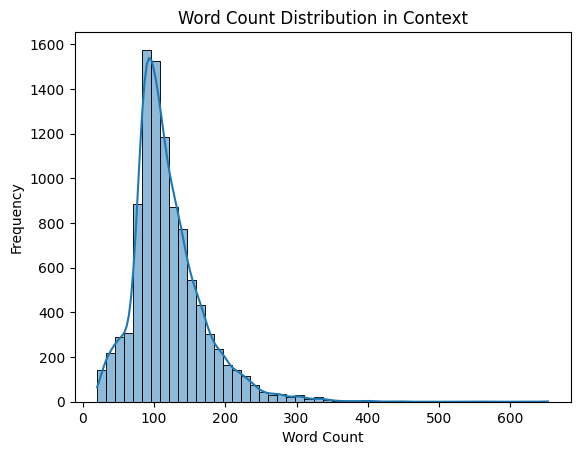

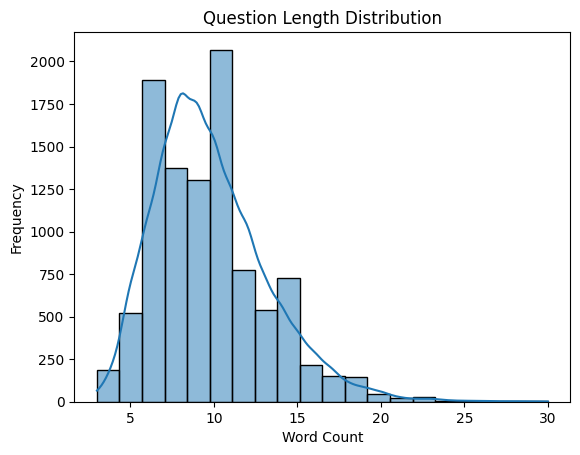

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import load_dataset

# Load SQuAD v2 dataset
squad_data = load_dataset("squad_v2")

# Select only 10,000 records
subset_size = 10000
squad_subset = squad_data['train'].shuffle(seed=42).select([i for i in range(subset_size)])

# Convert to Pandas DataFrame
df = pd.DataFrame(squad_subset)

# Display basic information about the DataFrame
print(df.info())

# Display the first few rows of the DataFrame
print(df.head())

# Descriptive Statistics
print(df.describe())


# Word Count Distribution in Context
df['context_word_count'] = df['context'].apply(lambda x: len(x.split()))
sns.histplot(df['context_word_count'], bins=50, kde=True)
plt.title('Word Count Distribution in Context')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()

# Question Length Distribution
df['question_word_count'] = df['question'].apply(lambda x: len(x.split()))
sns.histplot(df['question_word_count'], bins=20, kde=True)
plt.title('Question Length Distribution')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()


<ipython-input-8-5bb7e5e446d4>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


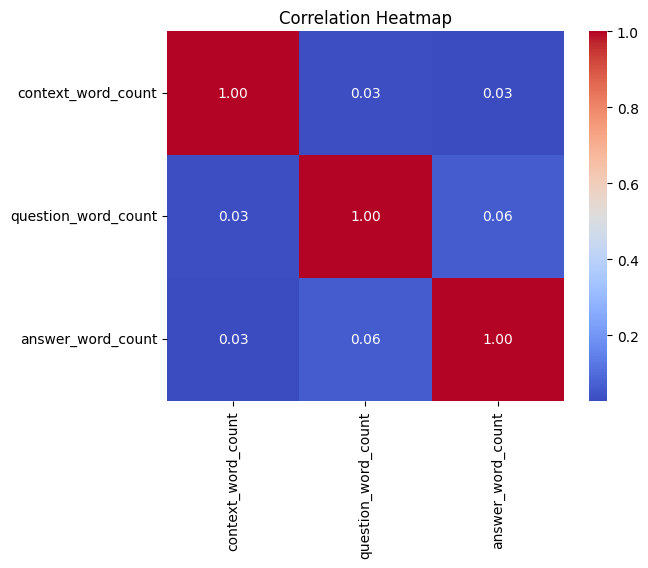

In [8]:
# Correlation Heatmap
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

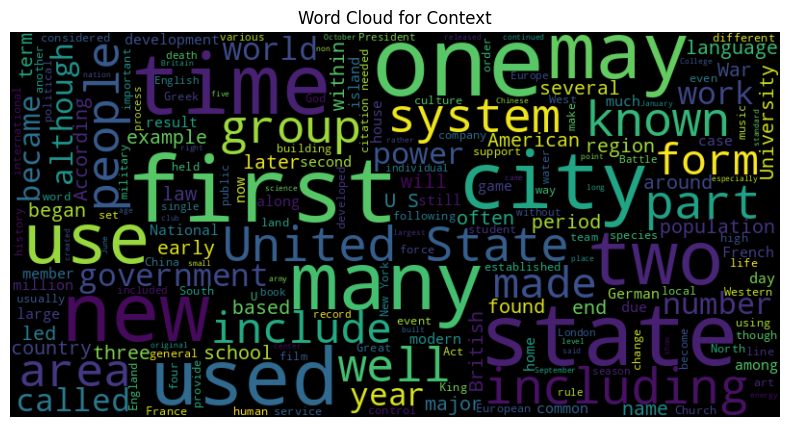

In [12]:
# Word Cloud for Context
from wordcloud import WordCloud

wordcloud = WordCloud(width = 800, height = 400, random_state=42, max_font_size=100).generate(' '.join(df['context']))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Word Cloud for Context')
plt.show()

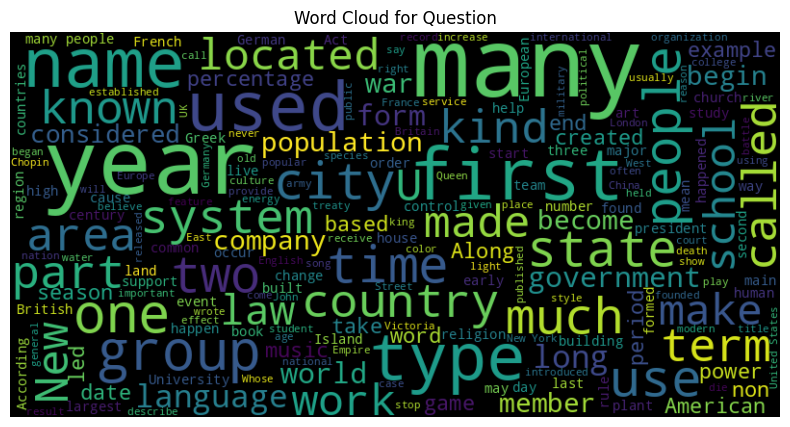

In [11]:
# Word Cloud for Context
from wordcloud import WordCloud

wordcloud = WordCloud(width = 800, height = 400, random_state=42, max_font_size=100).generate(' '.join(df['question']))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Word Cloud for Question')
plt.show()